In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer, Aer

backend = BasicAer.get_backend('qasm_simulator')
unitary_backend = BasicAer.get_backend('unitary_simulator')
number_of_shots = 1024

In [38]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)
#we create the states by taking U and V matrixes from singular decomposition and then making a matrix B
#with first column being singular values

In [39]:
qc.h(0) 
qc.cx(0,1)#b


In [40]:
qc.x(0)
qc.x(1)

job = execute(qc, unitary_backend)
job.result().get_unitary(qc, decimals=3) #first column is the resulting state

array([[ 0.70710678-1.73191211e-16j, -0.70710678+2.59786817e-16j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678-8.65956056e-17j,  0.70710678-1.73191211e-16j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678-8.65956056e-17j, -0.70710678+1.73191211e-16j],
       [ 0.70710678-6.49363033e-49j,  0.70710678-8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j]])

In [41]:
qc.measure(q, c)
qc.draw()

┌───┐     ┌───┐┌─┐   
q62_0: ┤ H ├──■──┤ X ├┤M├───
       └───┘┌─┴─┐├───┤└╥┘┌─┐
q62_1: ─────┤ X ├┤ X ├─╫─┤M├
            └───┘└───┘ ║ └╥┘
 c4: 2/════════════════╩══╩═
                       0  1

In [42]:


job = execute(qc, backend, shots=number_of_shots)

result = job.result()

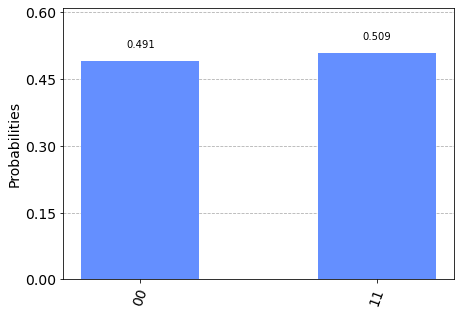

In [43]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([result.get_counts(qc)]) #00+11

In [44]:
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
qc2 = QuantumCircuit(q2, c2)

In [45]:
qc2.h(0) 
qc2.cx(0,1)#b

In [46]:
qc2.y(0)
qc2.x(1)
job = execute(qc2, unitary_backend)
job.result().get_unitary(qc2, decimals=3)#first column is the resulting state

array([[-1.29893408e-16-0.70710678j,  2.16489014e-16+0.70710678j,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ],
       [ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         1.29893408e-16+0.70710678j,  2.16489014e-16+0.70710678j],
       [ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
        -4.32978028e-17-0.70710678j,  1.29893408e-16+0.70710678j],
       [ 4.32978028e-17+0.70710678j,  1.29893408e-16+0.70710678j,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ]])

In [47]:
qc2.measure(q2, c2)
qc2.draw()

┌───┐     ┌───┐┌─┐   
q70_0: ┤ H ├──■──┤ Y ├┤M├───
       └───┘┌─┴─┐├───┤└╥┘┌─┐
q70_1: ─────┤ X ├┤ X ├─╫─┤M├
            └───┘└───┘ ║ └╥┘
 c5: 2/════════════════╩══╩═
                       0  1

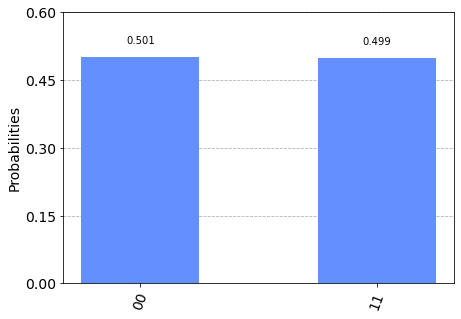

In [48]:
job = execute(qc2, backend, shots=number_of_shots)

result = job.result()
plot_histogram([result.get_counts(qc2)])

In [58]:
q3 = QuantumRegister(2)
c3 = ClassicalRegister(2)
qc3 = QuantumCircuit(q3, c3)
qc3.h(0) 
qc3.cx(0,1)#b

In [59]:
qc3.id(0)
qc3.x(1)
job = execute(qc3, unitary_backend)
job.result().get_unitary(qc3, decimals=3)#first column is the resulting state

array([[ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678-8.65956056e-17j,  0.70710678-1.73191211e-16j],
       [ 0.70710678-8.65956056e-17j, -0.70710678+1.73191211e-16j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]])

In [60]:
qc3.measure(q3, c3)
qc3.draw()

┌───┐     ┌───┐┌─┐   
q103_0: ┤ H ├──■──┤ I ├┤M├───
        └───┘┌─┴─┐├───┤└╥┘┌─┐
q103_1: ─────┤ X ├┤ X ├─╫─┤M├
             └───┘└───┘ ║ └╥┘
  c7: 2/════════════════╩══╩═
                        0  1

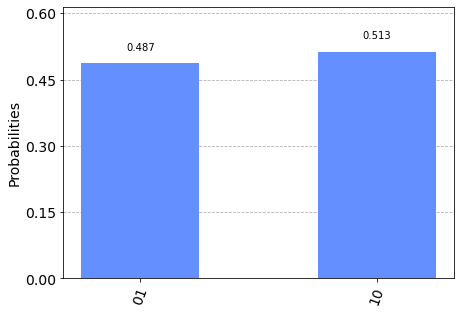

In [61]:
job = execute(qc3, backend, shots=number_of_shots)

result = job.result()
plot_histogram([result.get_counts(qc3)])

In [64]:
q4 = QuantumRegister(2)
c4 = ClassicalRegister(2)
qc4 = QuantumCircuit(q4, c4)
qc4.h(0) 
qc4.cx(0,1)#b
qc4.z(0)
qc4.x(1)
job = execute(qc4, unitary_backend)
job.result().get_unitary(qc4, decimals=3)#first column is the resulting state

array([[ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678-8.65956056e-17j,  0.70710678-1.73191211e-16j],
       [-0.70710678+1.73191211e-16j,  0.70710678-2.59786817e-16j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
        -0.70710678+8.65956056e-17j,  0.70710678-1.73191211e-16j]])

In [65]:

qc4.measure(q4, c4)
qc4.draw()

┌───┐     ┌───┐┌─┐   
q124_0: ┤ H ├──■──┤ Z ├┤M├───
        └───┘┌─┴─┐├───┤└╥┘┌─┐
q124_1: ─────┤ X ├┤ X ├─╫─┤M├
             └───┘└───┘ ║ └╥┘
 c10: 2/════════════════╩══╩═
                        0  1

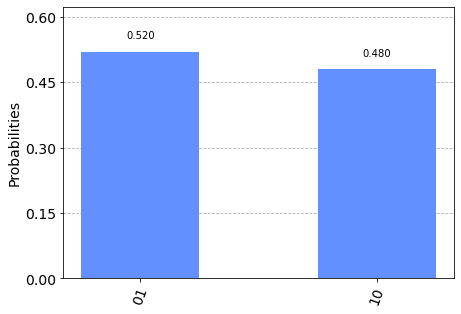

In [66]:
job = execute(qc, backend, shots=number_of_shots)

result = job.result()
plot_histogram([result.get_counts(qc4)])

In [70]:
q5 = QuantumRegister(2)
c5 = ClassicalRegister(2)
qc5 = QuantumCircuit(q5, c5)
qc5.u3(2*np.arccos(np.sqrt((3+np.sqrt(5))/6)),0,0,0) 
qc5.cx(0,1)#b

In [73]:
qc5.u3(2*np.arccos(np.sqrt(1/2.0+1/np.sqrt(5))),0,pi,0)
qc5.u3(2*np.arccos(np.sqrt(1/2.0+1/np.sqrt(5))),0,0 ,1)
job = execute(qc5, unitary_backend)
job.result().get_unitary(qc5, decimals=3) #first column is the resulting state

array([[ 0.8660254 +2.30666574e-18j, -0.38729833+6.03892931e-18j,
        -0.12909944-9.77119288e-18j,  0.28867513-2.55813151e-17j],
       [ 0.28867513-9.77119288e-18j,  0.12909944-2.55813151e-17j,
        -0.38729833+4.13914373e-17j, -0.8660254 +1.08364190e-16j],
       [ 0.28867513-9.77119288e-18j,  0.12909944-2.55813151e-17j,
         0.90369611-2.30666574e-18j, -0.28867513-6.03892931e-18j],
       [-0.28867513+4.13914373e-17j, -0.90369611+1.08364190e-16j,
         0.12909944+9.77119288e-18j, -0.28867513+2.55813151e-17j]])

In [74]:
qc5.measure(q5, c5)
qc5.draw()

┌─────────────────┐     ┌──────────────────┐┌─┐   
q139_0: ┤ U3(0.72973,0,0) ├──■──┤ U3(0.46365,0,pi) ├┤M├───
        └─────────────────┘┌─┴─┐├─────────────────┬┘└╥┘┌─┐
q139_1: ───────────────────┤ X ├┤ U3(0.46365,0,0) ├──╫─┤M├
                           └───┘└─────────────────┘  ║ └╥┘
 c14: 2/═════════════════════════════════════════════╩══╩═
                                                     0  1

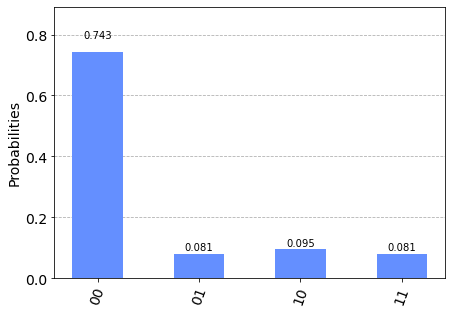

In [77]:
job = execute(qc5, backend, shots=number_of_shots)

result = job.result()
plot_histogram([result.get_counts(qc5)])